<center><h1>תרגול 1 - בעיות אופטימיזציה וגזירה וקטורית</h1></center>

## Setup

In [ ]:
## Importing packages
import numpy as np  # Numerical package (mainly multi-dimensional arrays and linear algebra)
import pandas as pd  # A package for working with data frames
import matplotlib.pyplot as plt  # A plotting package

## Setup matplotlib to output figures into the notebook
## - To make the figures interactive (zoomable, tooltip, etc.) use ""%matplotlib notebook" instead
%matplotlib inline

## Setting some nice matplotlib defaults
plt.rcParams['figure.figsize'] = (5.0, 5.0)  # Set default plot's sizes
plt.rcParams['figure.dpi'] = 120  # Set default plot's dpi (increase fonts' size)
plt.rcParams['axes.grid'] = True  # Show grid by default in figures

## Auxiliary function for prining equations and pandas tables in cells output
from IPython.core.display import display, HTML, Latex

## Setting style (not relevant in Colab)
display(HTML('<link rel="stylesheet" href="../../src/styles/style.css">'))  ## Use the same style as the rest of the site (mostly for titiles)
display(HTML("<style>.output_png { display: table-cell; text-align: center; vertical-align: middle; }</style>"))  ## Center output figures

## Circle fitting

### Generating points

In [ ]:
rand_gen = np.random.RandomState(1)
gt_center = np.array((3, 1))
gt_radius = 2
noise_std = 0.2

n_point = 30
points_angles = rand_gen.rand(n_point) * 2 * np.pi  # Draw random angles
points = np.stack((np.cos(points_angles), np.sin(points_angles)), axis=1)  # Generate points on the unit curcle  
points *= gt_radius  # Scale the circle by gt_raduis
points += gt_center[None, :]  # Move the corcle to the correct location
points += rand_gen.randn(n_point, 2) * noise_std  # Add random Gaussian noise

### Ploting the points

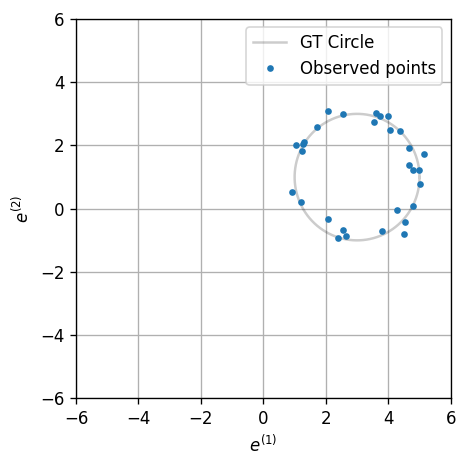

In [ ]:
angles = np.linspace(0, 2 * np.pi, 1000)
unit_circle = np.stack((np.cos(angles), np.sin(angles)), axis=1)
gt_circle = unit_circle * gt_radius
gt_circle += gt_center[None, :]


fig, ax = plt.subplots(figsize=(4, 4))
ax.set_xlabel('$e^{(1)}$')
ax.set_ylabel('$e^{(2)}$')
ax.plot(gt_circle[:, 0], gt_circle[:, 1], 'k', alpha=0.2, label='GT Circle')
ax.plot(points[:, 0], points[:, 1], '.', label='Observed points')
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.legend()
plt.tight_layout()
fig.savefig('./assets/circle_dataset.png')

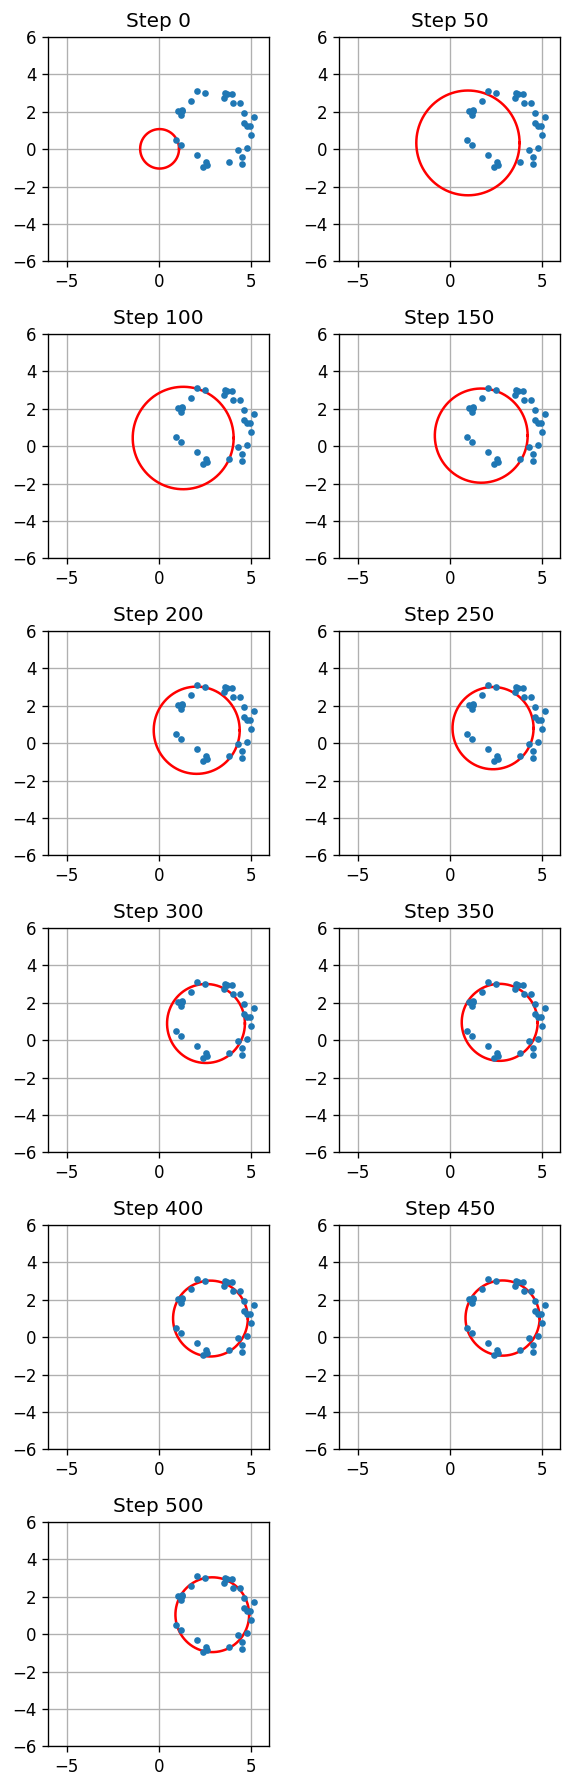

In [ ]:
center = np.array((0, 0))
radius = 1

eta = 0.01

fig, axes = plt.subplots(6, 2, figsize=(5, 15))
for t in range(0, 501):
    points_tmp = points - center[None, :]
    points_tmp_norm = (points_tmp ** 2).sum(axis=1) ** 0.5
    
    new_radius = radius - eta * 2 * ((radius - points_tmp_norm) * radius).mean()
    new_center = center - eta * 2 * (((radius - points_tmp_norm) / points_tmp_norm)[:, None] * points_tmp).mean(axis=0)
    
    radius = new_radius
    center = new_center
    
    if t % 50 == 0:
        ax = axes.flat[t // 50]
        circle = unit_circle * radius
        circle += center[None, :]
        ax.plot(circle[:, 0], circle[:, 1], 'r')
        ax.plot(points[:, 0], points[:, 1], '.')
        ax.set_xlim(-6, 6)
        ax.set_ylim(-6, 6)
        ax.set_title(f'Step {t}')
axes.flat[-1].remove()
plt.tight_layout()
fig.savefig('./assets/circle_fitting_iterations.png')